# RGU-IIT CBR - Results evaluation

## Imports

In [ ]:
!pip install datasets

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import files
from io import BytesIO
from heapq import nlargest
from tqdm import tqdm
from datasets import load_dataset, Dataset, DatasetDict
from sklearn.metrics.pairwise import cosine_similarity
from nltk.translate.bleu_score import corpus_bleu
from nltk.translate.bleu_score import SmoothingFunction

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 22.0 MB/s eta 0:00:00


## Load cases

In [ ]:
test_df_mistral = pd.read_csv("resources/generated_results_embddings.csv")

## Cosine calculation

In [ ]:
selected_columns_test = [
                    'answer_mistral_matching_emb',
                    'no_rag_pipeline_result_mistral_matching_emb',
                    'normal_bert_hybrid_snippet_k1_result_mistral_matching_emb',
                    'normal_bert_hybrid_case_k1_result_mistral_matching_emb',
                    'legal_bert_hybrid_snippet_k1_result_mistral_matching_emb',
                    'legal_bert_hybrid_case_k1_result_mistral_matching_emb',
                    'angle_bert_hybrid_snippet_k1_result_mistral_matching_emb',
                    'angle_bert_hybrid_case_k1_result_mistral_matching_emb',
                    'normal_bert_hybrid_snippet_k3_result_mistral_matching_emb',
                    'normal_bert_hybrid_case_k3_result_mistral_matching_emb',
                    'legal_bert_hybrid_snippet_k3_result_mistral_matching_emb',
                    'legal_bert_hybrid_case_k3_result_mistral_matching_emb',
                    'angle_bert_hybrid_snippet_k3_result_mistral_matching_emb',
                    'angle_bert_hybrid_case_k3_result_mistral_matching_emb'
                    ]

test_df_mistral = test_df_mistral.loc[:, selected_columns_test]
test_df_mistral.drop(index=[3, 33, 26], inplace=True)
test_df_mistral.reset_index(drop=True, inplace=True)

print(len(test_df_mistral))

32


In [ ]:
print(test_df_mistral.columns)

Index(['answer_mistral_matching_emb',
       'no_rag_pipeline_result_mistral_matching_emb',
       'normal_bert_hybrid_snippet_k1_result_mistral_matching_emb',
       'normal_bert_hybrid_case_k1_result_mistral_matching_emb',
       'legal_bert_hybrid_snippet_k1_result_mistral_matching_emb',
       'legal_bert_hybrid_case_k1_result_mistral_matching_emb',
       'angle_bert_hybrid_snippet_k1_result_mistral_matching_emb',
       'angle_bert_hybrid_case_k1_result_mistral_matching_emb',
       'normal_bert_hybrid_snippet_k3_result_mistral_matching_emb',
       'normal_bert_hybrid_case_k3_result_mistral_matching_emb',
       'legal_bert_hybrid_snippet_k3_result_mistral_matching_emb',
       'legal_bert_hybrid_case_k3_result_mistral_matching_emb',
       'angle_bert_hybrid_snippet_k3_result_mistral_matching_emb',
       'angle_bert_hybrid_case_k3_result_mistral_matching_emb'],
      dtype='object')


In [ ]:
def rename_columns(df):
    df.rename(columns={
        'answer_mistral_matching_emb': 'answer',
        'no_rag_pipeline_result_mistral_matching_emb': 'no_rag',
        'normal_bert_hybrid_snippet_k1_result_mistral_matching_emb': 'k1_nbert_hybrid_snippet',
        'normal_bert_hybrid_case_k1_result_mistral_matching_emb': 'k1_nbert_hybrid_case',
        'legal_bert_hybrid_snippet_k1_result_mistral_matching_emb': 'k1_lbert_hybrid_snippet',
        'legal_bert_hybrid_case_k1_result_mistral_matching_emb': 'k1_lbert_hybrid_case',
        'angle_bert_hybrid_snippet_k1_result_mistral_matching_emb': 'k1_abert_hybrid_snippet',
        'angle_bert_hybrid_case_k1_result_mistral_matching_emb': 'k1_abert_hybrid_case',
        'normal_bert_hybrid_snippet_k3_result_mistral_matching_emb': 'k3_nbert_hybrid_snippet',
        'normal_bert_hybrid_case_k3_result_mistral_matching_emb': 'k3_nbert_hybrid_case',
        'legal_bert_hybrid_snippet_k3_result_mistral_matching_emb': 'k3_lbert_hybrid_snippet',
        'legal_bert_hybrid_case_k3_result_mistral_matching_emb': 'k3_lbert_hybrid_case',
        'angle_bert_hybrid_snippet_k3_result_mistral_matching_emb': 'k3_abert_hybrid_snippet',
        'angle_bert_hybrid_case_k3_result_mistral_matching_emb': 'k3_abert_hybrid_case',
    }, inplace=True)

rename_columns(test_df_mistral)

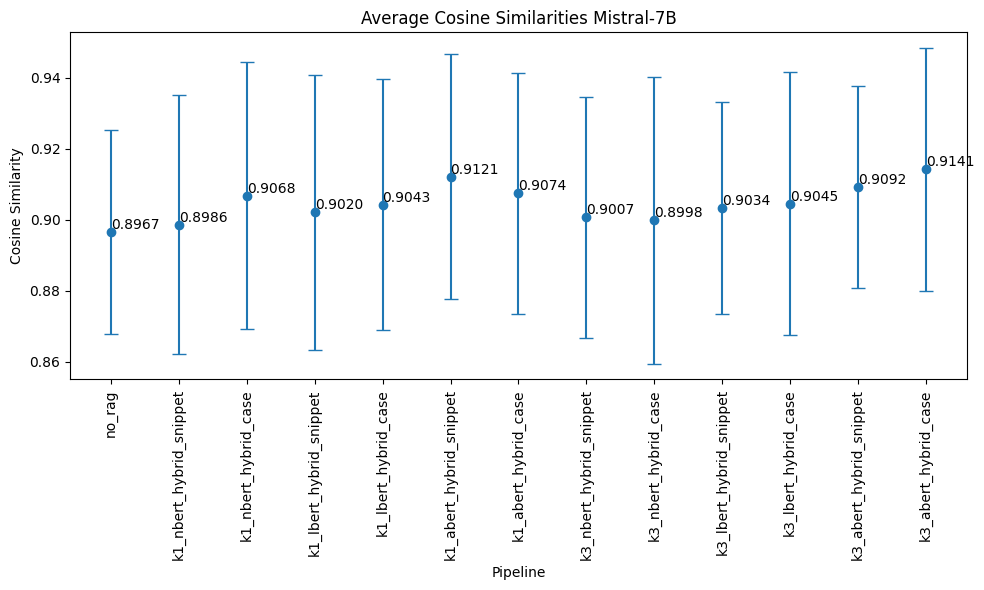



{'no_rag': 0.8966508650284504, 'k1_nbert_hybrid_snippet': 0.898617541252277, 'k1_nbert_hybrid_case': 0.9067778640759261, 'k1_lbert_hybrid_snippet': 0.902049012888654, 'k1_lbert_hybrid_case': 0.9042713402364871, 'k1_abert_hybrid_snippet': 0.9121339993082246, 'k1_abert_hybrid_case': 0.9074388020993048, 'k3_nbert_hybrid_snippet': 0.9006676002961549, 'k3_nbert_hybrid_case': 0.8998408881838149, 'k3_lbert_hybrid_snippet': 0.9034168072887466, 'k3_lbert_hybrid_case': 0.9045143425594679, 'k3_abert_hybrid_snippet': 0.909197792311198, 'k3_abert_hybrid_case': 0.9141484116287264}


In [ ]:
def string_to_array(embedding_string):
    if isinstance(embedding_string, str):
        return np.array(embedding_string.strip('[]').split(',')).astype(float)
    return embedding_string

def calculate_plot_cosine(df, title):
    target_columns = ['answer']
    cosine_results = {}
    for target_col in target_columns:
        actual_cols = [col for col in df.columns if target_col != col]
        for actual_col in actual_cols:
            if df[target_col].notnull().all() and df[actual_col].notnull().all():
                target_embeddings = df[target_col].apply(string_to_array).tolist()
                actual_embeddings = df[actual_col].apply(string_to_array).tolist()
                similarities = []
                for index, embedding in enumerate(target_embeddings):
                    similarity = cosine_similarity(np.array([target_embeddings[index]]), np.array([actual_embeddings[index]]))
                    similarities.append(similarity[0][0])
                cosine_results[actual_col] = np.array(similarities)

    # Calculate average values and standard deviations
    avg_cosine = {}
    std_dev_cosine = {}
    for col, sims in cosine_results.items():
        avg_cosine[col] = np.mean(sims)
        std_dev_cosine[col] = np.std(sims)

    # Plotting
    columns = list(cosine_results.keys())
    avg_values = list(avg_cosine.values())
    std_dev_values = list(std_dev_cosine.values())

    plt.figure(figsize=(10, 6))
    plt.errorbar(range(len(columns)), avg_values, yerr=std_dev_values, fmt='o', capsize=5)
    plt.xticks(range(len(columns)), columns, rotation=90)
    plt.title('Average Cosine Similarities ' + title)
    plt.xlabel('Pipeline')
    plt.ylabel('Cosine Similarity')

    # Annotate each data point
    for i, (x, y) in enumerate(zip(range(len(columns)), avg_values)):
        plt.text(x, y, f'{avg_values[i]:.4f}', ha='left', va='bottom')

    plt.tight_layout()
    plt.show()

    print()
    print()
    print(avg_cosine)

calculate_plot_cosine(test_df_mistral, 'Mistral-7B')

## Corpus BLEU calculation

In [ ]:
test_df_mistral = pd.read_csv("test_pipeline_results_mistral_mistral_emb.csv")

selected_columns_test = [
                    'answer',
                    'no_rag_pipeline_result',
                    'normal_bert_hybrid_snippet_k1_result',
                    'normal_bert_hybrid_case_k1_result',
                    'legal_bert_hybrid_snippet_k1_result',
                    'legal_bert_hybrid_case_k1_result',
                    'angle_bert_hybrid_snippet_k1_result',
                    'angle_bert_hybrid_case_k1_result',
                    'normal_bert_hybrid_snippet_k3_result',
                    'normal_bert_hybrid_case_k3_result',
                    'legal_bert_hybrid_snippet_k3_result',
                    'legal_bert_hybrid_case_k3_result',
                    'angle_bert_hybrid_snippet_k3_result',
                    'angle_bert_hybrid_case_k3_result'
                    ]

test_df_mistral = test_df_mistral.loc[:, selected_columns_test]
test_df_mistral.drop(index=[3, 33, 26], inplace=True)
test_df_mistral.reset_index(drop=True, inplace=True)

print(len(test_df_mistral))

32


{'no_rag_pipeline_result': 3.9086475473885306e-05, 'normal_bert_hybrid_snippet_k1_result': 5.056270254679212e-05, 'normal_bert_hybrid_case_k1_result': 0.00015506064750220896, 'legal_bert_hybrid_snippet_k1_result': 6.568853183363033e-05, 'legal_bert_hybrid_case_k1_result': 0.00017538000501625547, 'angle_bert_hybrid_snippet_k1_result': 7.522524550933497e-05, 'angle_bert_hybrid_case_k1_result': 0.0003880504498145046, 'normal_bert_hybrid_snippet_k3_result': 5.03209068184337e-05, 'normal_bert_hybrid_case_k3_result': 0.0001241600979801674, 'legal_bert_hybrid_snippet_k3_result': 5.471451632659436e-05, 'legal_bert_hybrid_case_k3_result': 0.0002111563390091318, 'angle_bert_hybrid_snippet_k3_result': 5.68205610920091e-05, 'angle_bert_hybrid_case_k3_result': 0.0001887273428432955}


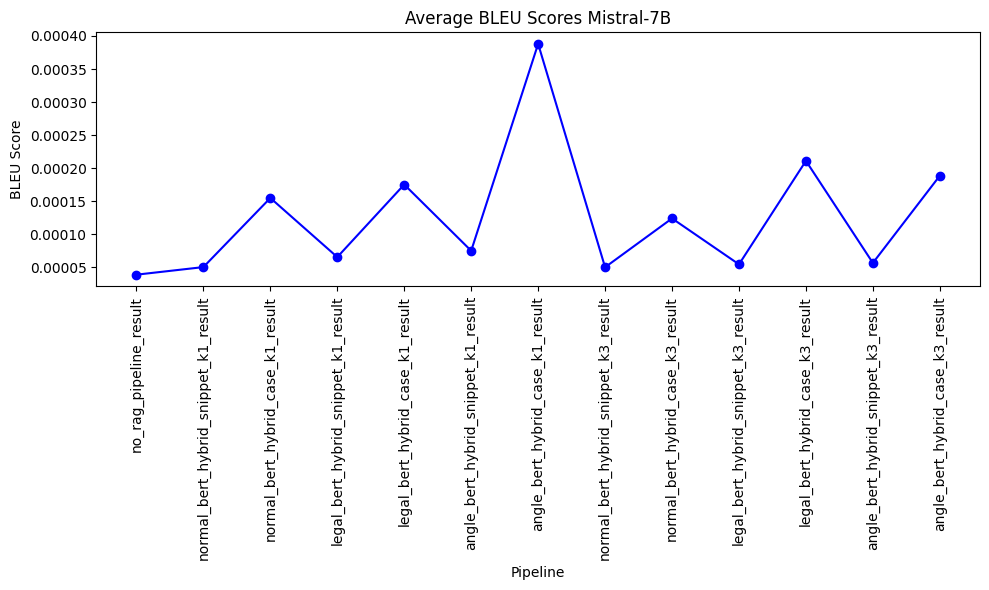



{'no_rag_pipeline_result': 3.9086475473885306e-05, 'normal_bert_hybrid_snippet_k1_result': 5.056270254679212e-05, 'normal_bert_hybrid_case_k1_result': 0.00015506064750220896, 'legal_bert_hybrid_snippet_k1_result': 6.568853183363033e-05, 'legal_bert_hybrid_case_k1_result': 0.00017538000501625547, 'angle_bert_hybrid_snippet_k1_result': 7.522524550933497e-05, 'angle_bert_hybrid_case_k1_result': 0.0003880504498145046, 'normal_bert_hybrid_snippet_k3_result': 5.03209068184337e-05, 'normal_bert_hybrid_case_k3_result': 0.0001241600979801674, 'legal_bert_hybrid_snippet_k3_result': 5.471451632659436e-05, 'legal_bert_hybrid_case_k3_result': 0.0002111563390091318, 'angle_bert_hybrid_snippet_k3_result': 5.68205610920091e-05, 'angle_bert_hybrid_case_k3_result': 0.0001887273428432955}


In [ ]:
bleu_scores = {}
raw_scores = []

def calculate_bleu(reference, candidate, ngram_range=(1, 1)):
    smoothing_function = SmoothingFunction().method2
    return corpus_bleu([reference.split()], [candidate.split()], weights=ngram_range, smoothing_function=smoothing_function)

def calculate_plot_bleu(df, title):
    for index, row in df.iterrows():
        reference = row['answer']
        row_scores = []
        for col in df.columns:
            if col != 'answer' and pd.notnull(row[col]):
                candidate = row[col]
                bleu = calculate_bleu(reference, candidate)
                bleu_scores.setdefault(col, []).append(bleu)
                row_scores.append(bleu)
        raw_scores.append(row_scores)

    # Calculating average scores
    average_bleu_scores = {col: sum(scores) / len(scores) for col, scores in bleu_scores.items()}
    print(average_bleu_scores)

    # Plotting average BLEU scores
    columns = list(average_bleu_scores.keys())
    avg_values_bleu = list(average_bleu_scores.values())

    plt.figure(figsize=(10, 6))
    plt.plot(range(len(columns)), avg_values_bleu, marker='o', linestyle='-', color='blue')
    plt.xticks(range(len(columns)), columns, rotation=90)
    plt.title('Average BLEU Scores ' + title)
    plt.xlabel('Pipeline')
    plt.ylabel('BLEU Score')

    plt.tight_layout()
    plt.show()

    print()
    print()
    print(average_bleu_scores)

calculate_plot_bleu(test_df_mistral, 'Mistral-7B')